#### Reading of important modules

In [87]:
import spacy

spacy.prefer_gpu()
nlp = spacy.load("en_core_web_lg")

In [88]:
import pandas as pd
import numpy as np
import re
import json
import yaml
from sklearn.manifold import TSNE
from sklearn.manifold.t_sne import _joint_probabilities

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [89]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns

#### Data Reading

In [90]:
path = 'C:\\Users\\Ankit\\Desktop\\case_studies\\harman\\'

In [91]:
data_1 = pd.read_csv(path + 'title-details.s92.20191105224308474.json-0.csv')
data_2 = pd.read_csv(path + 'title-details.s92.20191105224308474.json-1.csv')

data = data_1.append(data_2)

In [92]:
data_1.shape, data_2.shape, data.shape

((5000, 40), (5000, 37), (10000, 40))

In [93]:
data = data.iloc[:,1:]

In [94]:
drop_col = []

In [95]:
sorted(data_1.columns), sorted(data_2.columns)

(['ContentRatings',
  'Description',
  'Descriptions',
  'EncodedTitles',
  'Entitlements',
  'EpisodeName',
  'EpisodeNames',
  'EpisodeNumber',
  'Genres',
  'Id',
  'Images',
  'IsAdult',
  'IsNew',
  'LicenseWindowEndUtc',
  'Locale',
  'Name',
  'Names',
  'Network.Id',
  'Network.Images',
  'Network.IsAdult',
  'Network.Name',
  'Network.PFImages',
  'NetworkId',
  'Offers',
  'OriginalAirDate',
  'OriginalAssetId',
  'OriginalProviderId',
  'ProgramId',
  'ProviderId',
  'Ratings',
  'ReleaseYear',
  'Roles',
  'RuntimeSeconds',
  'SeasonId',
  'SeasonNumber',
  'SeriesId',
  'ShowType',
  'SupportedImages',
  'Tags',
  'Unnamed: 0'],
 ['ContentRatings',
  'Description',
  'Descriptions',
  'EncodedTitles',
  'Entitlements',
  'EpisodeNames',
  'EpisodeNumber',
  'Genres',
  'Id',
  'Images',
  'IsAdult',
  'IsNew',
  'LicenseWindowEndUtc',
  'Locale',
  'Name',
  'Names',
  'Network.Id',
  'Network.Images',
  'Network.IsAdult',
  'Network.Name',
  'Network.PFImages',
  'Network

In [96]:
[col for col in data_1.columns if col not in data_2.columns]

['EpisodeName', 'SeasonNumber', 'SeriesId']

In [97]:
[col for col in data_2.columns if col not in data_1.columns]

[]

### To-Do

### Pre-processing

#### Column needed to be dropped

In [98]:
data.head()

,ContentRatings,Description,Descriptions,EncodedTitles,Entitlements,EpisodeName,EpisodeNames,EpisodeNumber,Genres,Id,Images,IsAdult,IsNew,LicenseWindowEndUtc,Locale,Name,Names,Network.Id,Network.Images,Network.IsAdult,Network.Name,Network.PFImages,NetworkId,Offers,OriginalAirDate,OriginalAssetId,OriginalProviderId,ProgramId,ProviderId,Ratings,ReleaseYear,Roles,RuntimeSeconds,SeasonId,SeasonNumber,SeriesId,ShowType,SupportedImages,Tags
0,NaN,A small band of outcast mutants fights to save...,"[{'Culture': 'en-us', 'Value': 'A small band o...",[{'Id': 'tams2013122481455533_tams201312248145...,[],NaN,[],NaN,[],tams2013122481455533_tams2013122481455534-trailer,"[{'Size': 'Small', 'ImageType': 'PosterLandsca...",False,NaN,2031-01-03T06:59:00Z,en-us,X-Men 1,"[{'Culture': 'en-us', 'Value': 'X-Men 1'}]",NaN,NaN,NaN,NaN,NaN,NaN,[{'Id': 'b78168e9-412b-4943-b745-93b0741f0cef'...,NaN,tams2013122481455534,tams2013122481455533,fake_tams2013122481455534_tams2013122481455533,tams2013122481455533,"[{'System': 'TELUSMovie', 'Value': 'PG'}]",2000,"[{'RoleName': 'Director', 'PersonId': '160143'...",110,NaN,NaN,NaN,Movie,"['2x3/Poster', 'PosterLandscape']",['Trailer']
1,NaN,Au premier jour de sa collaboration avec Chris...,"[{'Culture': 'en-us', 'Value': 'Au premier jou...",[{'Id': 'mongrelmedia.com_tams2201809070839053...,[],NaN,[],NaN,"[{'Id': '2921', 'Name': 'Suspense'}]",mongrelmedia.com_tams22018090708390531-trailer,"[{'Size': 'Small', 'ImageType': 'PosterLandsca...",False,NaN,2023-03-02T06:59:00Z,fr-ca,Le bourreau,"[{'Culture': 'en-us', 'Value': 'Le bourreau'}]",NaN,NaN,NaN,NaN,NaN,NaN,[{'Id': '0867372c-887f-492f-aaf5-3b1278017eaf'...,NaN,tams22018090708390531,mongrelmedia.com,fake_tams22018090708390531,mongrelmedia.com,"[{'System': 'TELUSMovie', 'Value': '14A'}]",2017,"[{'RoleName': 'Actor', 'PersonId': '2657', 'Pe...",96,NaN,NaN,NaN,Movie,"['2x3/Poster', '16x9/KeyArt', 'PosterLandscape']",['Trailer']
2,NaN,Featuring stand-up performances by John Pinett...,"[{'Culture': 'en-us', 'Value': 'Featuring stan...",[{'Id': 'bellmedia.ca_tams22019061913281711_Hl...,['jailbroken_blocked'],NaN,[],NaN,[],bellmedia.ca_tams22019061913281711,"[{'Size': 'Small', 'ImageType': 'PosterLandsca...",False,NaN,2034-02-01T10:01:00Z,en-us,Tommy Tiernan & Friends,"[{'Culture': 'en-us', 'Value': 'Tommy Tiernan ...",a9afe0fe-b335-496f-ae13-a37f468de376,"[{'Size': 'Large', 'ImageType': 'OneFootLarge'...",False,Crave,NaN,a9afe0fe-b335-496f-ae13-a37f468de376,[{'Id': '3fce3d0c-0281-4727-aa50-be87cd8f98f1'...,NaN,tams22019061913281711,bellmedia.ca,fake_tams22019061913281711_bellmedia.ca,bellmedia.ca,"[{'System': 'Canada', 'Value': '14+'}]",2012,"[{'RoleName': 'Actor', 'PersonId': '85515', 'P...",2645,NaN,NaN,NaN,Movie,"['2x3/Poster', '16x9/KeyArt', 'PosterLandscape']",['Feature']
3,NaN,Buy Moonlight and watch it now and anytime you...,"[{'Culture': 'en-us', 'Value': ""Buy Moonlight ...",[{'Id': 'elevationpictures.com_tams22017021314...,[],NaN,[],NaN,"[{'Id': '2715', 'Name': 'Drama'}]",elevationpictures.com_tams22017021314201285-tr...,[],False,NaN,2088-02-09T06:59:00Z,en-us,Moonlight - Own It,"[{'Culture': 'en-us', 'Value': 'Moonlight - Ow...",NaN,NaN,NaN,NaN,NaN,NaN,[{'Id': '69421984-ee7d-47db-8e92-b627372bfc7c'...,2016-01-01T00:00:00Z,tams22017021314201285,elevationpictures.com,fake_tams22017021314201285_elevationpictures.com,elevationpictures.com,"[{'System': 'TELUSMovie', 'Value': '14A'}]",2016,"[{'RoleName': 'Director', 'PersonId': '381186'...",115,NaN,NaN,NaN,Movie,NaN,['Trailer']
4,NaN,Buy Pirates of the Caribbean: Dead Men Tell No...,"[{'Culture': 'en-us', 'Value': 'Buy Pirates of...",[{'Id': 'disney.com_tams22017091208540856-trai...,[],NaN,[],NaN,"[{'Id': '2001', 'Name': 'Action and Adventure'...",disney.com_tams22017091208540856-trailer,"[{'Size': 'Small', 'ImageType': 'PosterLandsca...",False,NaN,2087-09-08T05:59:00Z,en-us,Pirates of the Caribbean: Dead Men Tell No Tal...,"[{'Culture': 'en-us', 'Value': 'Pirates of the...",NaN,NaN,NaN,NaN,NaN,NaN,[{'Id': '915f1589

In [99]:
# seems to be non-relevant or having more than 50 percent null values
drop_col = ['Descriptions','EncodedTitles','Entitlements','EpisodeName','EpisodeNames','EpisodeNumber','Images','LicenseWindowEndUtc','Names','Network.Id','Network.Images','Network.IsAdult','Network.Name','Network.PFImages','NetworkId','Offers','OriginalAirDate','OriginalAssetId','OriginalProviderId','ProgramId','ProviderId','SeasonId','SeasonNumber','SeriesId','SupportedImages']

In [100]:
data.drop(columns=drop_col, inplace=True)

In [101]:
data.head()

,ContentRatings,Description,Genres,Id,IsAdult,IsNew,Locale,Name,Ratings,ReleaseYear,Roles,RuntimeSeconds,ShowType,Tags
0,NaN,A small band of outcast mutants fights to save...,[],tams2013122481455533_tams2013122481455534-trailer,False,NaN,en-us,X-Men 1,"[{'System': 'TELUSMovie', 'Value': 'PG'}]",2000,"[{'RoleName': 'Director', 'PersonId': '160143'...",110,Movie,['Trailer']
1,NaN,Au premier jour de sa collaboration avec Chris...,"[{'Id': '2921', 'Name': 'Suspense'}]",mongrelmedia.com_tams22018090708390531-trailer,False,NaN,fr-ca,Le bourreau,"[{'System': 'TELUSMovie', 'Value': '14A'}]",2017,"[{'RoleName': 'Actor', 'PersonId': '2657', 'Pe...",96,Movie,['Trailer']
2,NaN,Featuring stand-up performances by John Pinett...,[],bellmedia.ca_tams22019061913281711,False,NaN,en-us,Tommy Tiernan & Friends,"[{'System': 'Canada', 'Value': '14+'}]",2012,"[{'RoleName': 'Actor', 'PersonId': '85515', 'P...",2645,Movie,['Feature']
3,NaN,Buy Moonlight and watch it now and anytime you...,"[{'Id': '2715', 'Name': 'Drama'}]",elevationpictures.com_tams22017021314201285-tr...,False,NaN,en-us,Moonlight - Own It,"[{'System': 'TELUSMovie', 'Value': '14A'}]",2016,"[{'RoleName': 'Director', 'PersonId': '381186'...",115,Movie,['Trailer']
4,NaN,Buy Pirates of the Caribbean: Dead Men Tell No...,"[{'Id': '2001', 'Name': 'Action and Adventure'...",disney.com_tams22017091208540856-trailer,False,NaN,en-us,Pirates of the Caribbean: Dead Men Tell No Tal...,"[{'System': 'TELUSMovie', 'Value': 'PG'}]",2017,"[{'RoleName': 'Director', 'PersonId': '548927'...",146,Movie,['Trailer']


##### 1) ContentRatings

In [102]:
data['ContentRatings'].nunique(), data['ContentRatings'].isna().sum(), data['ContentRatings'].isna().sum()/(data.shape[0])

(4035, 5965, 0.5965)

In [103]:
data.drop(columns=['ContentRatings'], inplace=True)

##### 2) Description

In [104]:
 data['Description'].nunique(), data['Description'].isna().sum(), data['Description'].isna().sum()/data.shape[0]

(6755, 32, 0.0032)

##### 3)Genres

In [105]:
from ast import literal_eval

In [106]:
data['Genres'] = data['Genres'].apply(literal_eval)

In [107]:
def get_list(x):
    if isinstance(x, list):
        names = [i['Name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        if names==[]:
            return(np.nan)
        else:
            return(names)

    #Return empty list in case of missing/malformed data
    return np.nan

In [108]:
data['Genres'] = data['Genres'].apply(get_list)

In [109]:
data.head()

,Description,Genres,Id,IsAdult,IsNew,Locale,Name,Ratings,ReleaseYear,Roles,RuntimeSeconds,ShowType,Tags
0,A small band of outcast mutants fights to save...,NaN,tams2013122481455533_tams2013122481455534-trailer,False,NaN,en-us,X-Men 1,"[{'System': 'TELUSMovie', 'Value': 'PG'}]",2000,"[{'RoleName': 'Director', 'PersonId': '160143'...",110,Movie,['Trailer']
1,Au premier jour de sa collaboration avec Chris...,[Suspense],mongrelmedia.com_tams22018090708390531-trailer,False,NaN,fr-ca,Le bourreau,"[{'System': 'TELUSMovie', 'Value': '14A'}]",2017,"[{'RoleName': 'Actor', 'PersonId': '2657', 'Pe...",96,Movie,['Trailer']
2,Featuring stand-up performances by John Pinett...,NaN,bellmedia.ca_tams22019061913281711,False,NaN,en-us,Tommy Tiernan & Friends,"[{'System': 'Canada', 'Value': '14+'}]",2012,"[{'RoleName': 'Actor', 'PersonId': '85515', 'P...",2645,Movie,['Feature']
3,Buy Moonlight and watch it now and anytime you...,[Drama],elevationpictures.com_tams22017021314201285-tr...,False,NaN,en-us,Moonlight - Own It,"[{'System': 'TELUSMovie', 'Value': '14A'}]",2016,"[{'RoleName': 'Director', 'PersonId': '381186'...",115,Movie,['Trailer']
4,Buy Pirates of the Caribbean: Dead Men Tell No...,"[Action and Adventure, Fantasy]",disney.com_tams22017091208540856-trailer,False,NaN,en-us,Pirates of the Caribbean: Dead Men Tell No Tal...,"[{'System': 'TELUSMovie', 'Value': 'PG'}]",2017,"[{'RoleName': 'Director', 'PersonId': '548927'...",146,Movie,['Trailer']


##### 4) Ratings

In [110]:
data['Ratings'] = data['Ratings'].apply(literal_eval)

In [111]:
def json_extract(x, key):
    return(x[0][key])

In [112]:
for key in ['System','Value']:
        data['R_' + key] = data.apply(lambda x: json_extract(x.Ratings, key), axis=1)
        data['R_'+ key] = data['R_'+ key].apply(lambda x: str.lower(x))

In [113]:
data.rename({'R_Value':'R_Ratings'}, axis = 1,inplace=True)

In [114]:
data.drop(columns = ['Ratings'], inplace=True)

In [115]:
data['R_System'].nunique(), data['R_Ratings'].nunique()

(2, 10)

In [116]:
data['R_System'].unique(), data['R_Ratings'].unique()

(array(['telusmovie', 'canada'], dtype=object),
 array(['pg', '14a', '14+', 'g', '18+', '18a', 'e', 'r', 'c', 'c8+'],
       dtype=object))

##### 5) Id

In [117]:
data['Id'].nunique()
# acts as a  primary key

10000

##### 6) IsAdult

In [118]:
data['IsAdult'].unique()

array([False])

In [119]:
# only one value
data.drop(columns = ['IsAdult'], inplace=True)

##### 7) IsNew

In [120]:
data['IsNew'].unique()

array([nan, True], dtype=object)

In [121]:
data['IsNew'] = data['IsNew'].fillna(False)

In [122]:
data['IsNew'].unique()

array([False,  True])

In [123]:
data.groupby(['IsNew']).count()

,Description,Genres,Id,Locale,Name,ReleaseYear,Roles,RuntimeSeconds,ShowType,Tags,R_System,R_Ratings
IsNew,,,,,,,,,,,,
False,9952,8573,9984,9984,9984,9984,9984,9984,9984,9984,9984,9984
True,16,5,16,16,16,16,16,16,16,16,16,16


##### 8) Locale

In [124]:
data['Locale'].unique()

array(['en-us', 'fr-ca', 'en', 'fr-fr', 'fr'], dtype=object)

In [125]:
data.groupby(['Locale'])['Genres'].count()

Locale
en       4898
en-us    1819
fr          2
fr-ca    1784
fr-fr      75
Name: Genres, dtype: int64

In [126]:
data['ShowType'].unique(), data['Tags'].unique()

(array(['Movie', 'TVShow'], dtype=object),
 array(["['Trailer']", "['Feature']"], dtype=object))

In [127]:
#combining english and french togather

data['Locale'] = np.where(data['Locale'].isin(['en','en-us']), 'en', 'fr')

In [128]:
data.groupby(['Locale'])['Genres'].count()

Locale
en    6717
fr    1861
Name: Genres, dtype: int64

##### 9) Name

In [129]:
data['Name'].isna().sum()

0

In [130]:
data['Name'].nunique()

6668

In [131]:
data_p = data[['Name','Id']].groupby(['Name']).aggregate(lambda tdf: tdf.unique().tolist()).reset_index()

data_p.rename({'Id':'Grouped_Id'}, inplace=True)

data_p.head()

,Name,Id
0,#CATS_The_Mewvie,[citytvnow.com_tams22019092614244416]
1,$4 - Men in Black: International,"[sonypictures.com_tams22019102810203697, sonyp..."
2,$4 - Missing Link,[elevationpictures.com_tams22019102512314831-t...
3,(500) Days of Summer,[tams2013122781504804_tams2013122781504805-tra...
4,10 1/2,[entertainmentone.ca_tams22017022007515440-tra...


In [132]:
data_p1 = data.drop(columns=['Id'])
data_p2 = data_p1.groupby('Name').aggregate('first').reset_index()

data_p3 = pd.merge(data_p2, data_p, on=['Name'], how='inner')

In [133]:
data_p3.tail()

,Name,Description,Genres,IsNew,Locale,ReleaseYear,Roles,RuntimeSeconds,ShowType,Tags,R_System,R_Ratings,Id
6663,Épique,"Après avoir été magiquement miniaturisée, une ...","[Children, Other]",False,fr,2013,"[{'RoleName': 'Voice', 'PersonId': '199695', '...",6194,Movie,['Feature'],telusmovie,g,[foxmovies.com_tams22015121114341178]
6664,Étudiante: Option escorte,Une étudiante se laisse convaincre par sa colo...,"[Drama, Suspense]",False,fr,2015,"[{'RoleName': 'Actor', 'PersonId': '290499', '...",5461,Movie,['Feature'],telusmovie,pg,[bellmedia.ca_tams22017121111571085]
6665,"Été de mes 11 ans, L'",Une fillette hypocondriaque accepte difficilem...,"[Comedy, Other, Children]",False,fr,1991,"[{'RoleName': 'Actor', 'PersonId': '320', 'Per...",6151,Movie,['Feature'],telusmovie,g,[tams2014112092540920_tams2014112092540921]
6666,Évènement JMP 2008-2010 : volume 1,L'Événement JMP c'est le rendez-vous le plus c...,[Comedy],False,en,2016,[],114,Movie,['Trailer'],telusmovie,g,"[tvafilms.com_tams22018030708433484-trailer, t..."
6667,Être Llewyn Davis,"En 1961, la vie de bohème d'un chanteur folk m...","[Drama, Comedy]",False,fr,2013,"[{'RoleName': 'Actor', 'PersonId': '493617', '...",6295,Movie,['Feature'],telusmovie,g,"[mongrelmedia.com_tams22015102307102017, mongr..."


##### 10)ReleaseYear

In [134]:
data_p3['ReleaseYear'].isna().sum()

0

##### 11)Roles

In [135]:
data_p3['Roles'] = data_p3['Roles'].apply(literal_eval)

In [136]:
keys = ['Actor','Director', 'Producer']

def get_person(x, key):
    person = []
    if isinstance(x, list):
        for i in x:
            if ('RoleName' in list(i.keys()) and ('PersonName' in list(i.keys())) and (i['RoleName']==key)):
                person.append(i['PersonName'])
    if person==[]:
        return np.nan
    else:
        return(person)

In [137]:
for key in keys:
    data_p3[key] = data_p3['Roles'].apply(lambda x: get_person(x, key))
    data_p3[key] = np.where(len(data_p3[key])>0, data_p3[key], np.nan)

In [138]:
data_p3.drop(columns=['Roles'], inplace=True)

In [139]:
data_p3.head()

,Name,Description,Genres,IsNew,Locale,ReleaseYear,RuntimeSeconds,ShowType,Tags,R_System,R_Ratings,Id,Actor,Director,Producer
0,#CATS_The_Mewvie,Celebrity cat owners and online experts explor...,[Other],False,en,2019,5618,Movie,['Feature'],canada,pg,[citytvnow.com_tams22019092614244416],NaN,NaN,"[Claire Freeland, Keely Booth, Michael Margolis]"
1,$4 - Men in Black: International,$4 for a limited time! The Men in Black have e...,"[Sci Fi, Comedy, Action and Adventure]",False,en,2019,6900,Movie,['Feature'],telusmovie,pg,"[sonypictures.com_tams22019102810203697, sonyp...","[Chris Hemsworth, Tessa Thompson, Kumail Nanji...",NaN,NaN
2,$4 - Missing Link,$4 for a limited time! Tired of living a solit...,"[Children, Comedy, Action and Adventure]",False,en,2019,147,Movie,['Trailer'],telusmovie,pg,[elevationpictures.com_tams22019102512314831-t...,"[Hugh Jackman, Zach Galifianakis, Zoe Saldana]",NaN,NaN
3,(500) Days of Summer,When a young greeting card writer who believes...,NaN,False,en,2009,125,Movie,['Trailer'],telusmovie,pg,[tams2013122781504804_tams2013122781504805-tra...,"[Minka Kelly, Joseph Gordon-Levitt, Clark Greg...",[Marc Webb],"[Jessica Tuchinsky, Mason Novick, Mark Waters]"
4,10 1/2,"Envoyé dans un centre fermé, un délinquant de ...",[Drama],False,fr,2010,112,Movie,['Trailer'],telusmovie,18a,[entertainmentone.ca_tams22017022007515440-tra...,"[Albert Kwan, Claude Legault, Robert Naylor]",[Daniel Grou],[Pierre Gendron]


##### 12) RuntimeSeconds, ShowType, R_System, R_Ratings

In [140]:
data_p3.groupby(['R_Ratings']).count()

,Name,Description,Genres,IsNew,Locale,ReleaseYear,RuntimeSeconds,ShowType,Tags,R_System,Id,Actor,Director,Producer
R_Ratings,,,,,,,,,,,,,,
14+,545,545,480,545,545,545,545,545,545,545,545,433,395,330
14a,1735,1735,1677,1735,1735,1735,1735,1735,1735,1735,1735,1665,1573,1119
18+,255,255,239,255,255,255,255,255,255,255,255,204,152,120
18a,417,417,395,417,417,417,417,417,417,417,417,403,380,270
c,9,9,8,9,9,9,9,9,9,9,9,6,4,2
c8+,4,4,2,4,4,4,4,4,4,4,4,3,1,1
e,106,106,56,106,106,106,106,106,106,106,106,9,23,20
g,1804,1804,1261,1804,1804,1804,1804,1804,1804,1804,1804,943,1078,582
pg,1720,1690,1352,1720,1720,1720,1720,1720,1720,1720,1720,1221,1201,820


In [141]:
def rat_exp(x):
    if x in ['g']:
        return('minimal, infrequent, general')
    elif x in ['r']:
        return('Restricted, violence , nudity, adult')
    elif x in ['c','c8+']:
        return('children, toy, cartoon, animated, might contain occasional comedy')
    elif x in ['14+','14a','pg']:
        return('parental guidance required profanity')
    else:
        return('violence, nudity')

In [142]:
data_p3['Rating_proc'] = data_p3['R_Ratings'].apply(lambda x: rat_exp(x))

In [143]:
data_p3.groupby(['ShowType']).agg({'RuntimeSeconds':'median'})

,RuntimeSeconds
ShowType,
Movie,5490
TVShow,3187


In [144]:
data_p3.groupby(['Tags']).agg({'RuntimeSeconds':'median'})

,RuntimeSeconds
Tags,
['Feature'],5683
['Trailer'],122


In [145]:
data_p3.groupby(['ShowType','Tags']).agg({'RuntimeSeconds':'mean'})

RuntimeSeconds
ShowType Tags                       
Movie    ['Feature']     5538.809679
         ['Trailer']      116.279089
TVShow   ['Feature']     3740.823944
         ['Trailer']       91.176471

<AxesSubplot:xlabel='RuntimeSeconds', ylabel='Count'>

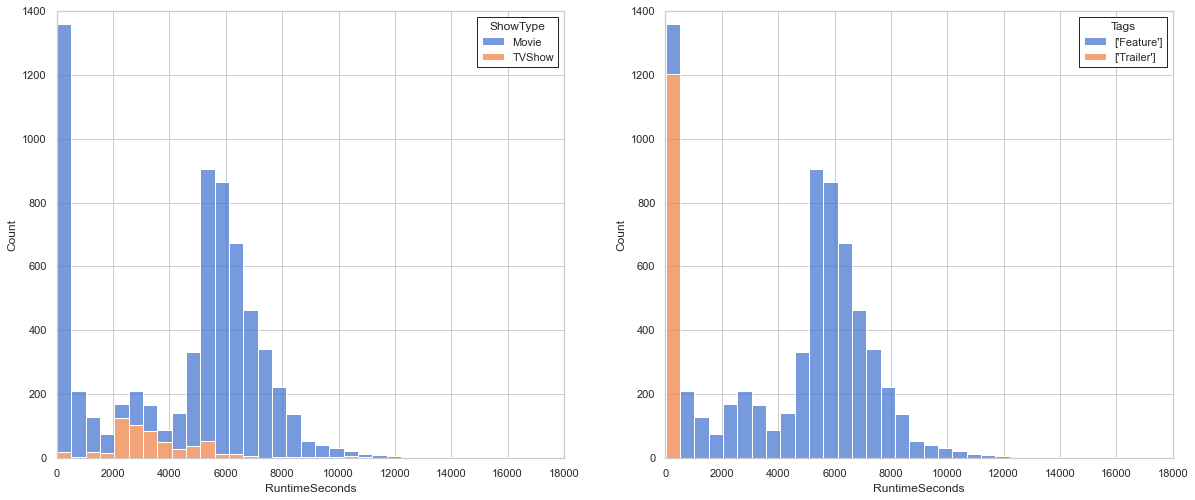

In [146]:
sns.set_theme(style="whitegrid")
fig_dims = (20,8)
fig, ax = plt.subplots(figsize=fig_dims, ncols=2)

sns.set(style="white", palette="muted")
sns.histplot(data = data_p3, x='RuntimeSeconds', hue ='ShowType', multiple="stack", ax=ax[0])
sns.histplot(data = data_p3, x='RuntimeSeconds', hue ='Tags', multiple="stack", ax=ax[1])

### Content based Recommender System

In [147]:
features = ['Name','Id','Genres','Actor','Director','Producer','Rating_proc','Description','Locale']

In [148]:
data_rec = data_p3[features]

In [149]:
data_rec.head()

,Name,Id,Genres,Actor,Director,Producer,Rating_proc,Description,Locale
0,#CATS_The_Mewvie,[citytvnow.com_tams22019092614244416],[Other],NaN,NaN,"[Claire Freeland, Keely Booth, Michael Margolis]",parental guidance required profanity,Celebrity cat owners and online experts explor...,en
1,$4 - Men in Black: International,"[sonypictures.com_tams22019102810203697, sonyp...","[Sci Fi, Comedy, Action and Adventure]","[Chris Hemsworth, Tessa Thompson, Kumail Nanji...",NaN,NaN,parental guidance required profanity,$4 for a limited time! The Men in Black have e...,en
2,$4 - Missing Link,[elevationpictures.com_tams22019102512314831-t...,"[Children, Comedy, Action and Adventure]","[Hugh Jackman, Zach Galifianakis, Zoe Saldana]",NaN,NaN,parental guidance required profanity,$4 for a limited time! Tired of living a solit...,en
3,(500) Days of Summer,[tams2013122781504804_tams2013122781504805-tra...,NaN,"[Minka Kelly, Joseph Gordon-Levitt, Clark Greg...",[Marc Webb],"[Jessica Tuchinsky, Mason Novick, Mark Waters]",parental guidance required profanity,When a young greeting card writer who believes...,en
4,10 1/2,[entertainmentone.ca_tams22017022007515440-tra...,[Drama],"[Albert Kwan, Claude Legault, Robert Naylor]",[Daniel Grou],[Pierre Gendron],"violence, nudity","Envoyé dans un centre fermé, un délinquant de ...",fr


In [150]:
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~] ', '')) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]', ' '))
        else:
            return ''

In [151]:
for feature in features:
    if feature=='Name' or feature=='Description' or feature=='Id' or feature=='Locale':
        continue
    data_rec[feature] = data_rec[feature].apply(clean_data)

<ipython-input-151-b9bac623ca86>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rec[feature] = data_rec[feature].apply(clean_data)


In [156]:
data_rec['Name_proc'] = data_rec['Name'].apply(clean_data)
data_rec['Description_proc'] = data_rec['Description'].apply(clean_data)

def create_soup(x):
    return(' '+x['Name_proc'] + ' '+x['Description_proc'] + ' '+x['Rating_proc'] + ' '.join(x['Genres'])+ ' ' + ' '.join(x['Actor']) + ' ' + ' '.join(x['Director'])+ ' ' + ' '.join(x['Producer']))

def create_soup_1(x):
    return(' '+x['Name_proc'] + ' '+x['Rating_proc'] + ' '.join(x['Genres'])+ ' ' + ' '.join(x['Actor']) + ' ' + ' '.join(x['Director'])+ ' ' + ' '.join(x['Producer']))

data_rec['soup'] = data_rec.apply(create_soup, axis=1)
data_rec['soup_1'] = data_rec.apply(create_soup_1, axis=1)


data_rec['soup'] = data_rec['soup'].fillna('')
data_rec['soup_1'] = data_rec['soup_1'].fillna('')

<ipython-input-156-4269e9046c85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rec['Name_proc'] = data_rec['Name'].apply(clean_data)
<ipython-input-156-4269e9046c85>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rec['Description_proc'] = data_rec['Description'].apply(clean_data)
<ipython-input-156-4269e9046c85>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

#### Text_processing

In [157]:
from nltk.stem import WordNetLemmatizer
import string
from nltk.corpus import stopwords
lemmatizer = WordNetLemmatizer()
STOPWORDS = set(stopwords.words('english'))

def process(x):
    PUNCT_TO_REMOVE = string.punctuation
    x = x.translate(str.maketrans('', '', PUNCT_TO_REMOVE))
    y = " ".join([word for word in str(x).split() if word not in STOPWORDS])
    y = " ".join([lemmatizer.lemmatize(word) for word in x.split()])
    return(y)

In [158]:
data_rec['soup'] = data_rec['soup'].str.lower()
data_rec['soup_proc'] = data_rec['soup'].apply(lambda x: process(x))

data_rec['soup_1'] = data_rec['soup_1'].str.lower()
data_rec['soup_proc_1'] = data_rec['soup_1'].apply(lambda x: process(x))

<ipython-input-158-f0e78776ce74>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rec['soup'] = data_rec['soup'].str.lower()
<ipython-input-158-f0e78776ce74>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rec['soup_proc'] = data_rec['soup'].apply(lambda x: process(x))
<ipython-input-158-f0e78776ce74>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

#### Creation of Embedding Vector for each text

In [159]:
def embedding(text):
    tokens = nlp(text)
    return(tokens.vector)

In [160]:
data_rec['emb'] = data_rec['soup_proc'].apply(lambda x: embedding(x))
data_rec['emb_1'] = data_rec['soup_proc_1'].apply(lambda x: embedding(x))

In [161]:
x_emb = np.array(data_rec['emb'].tolist())
x_emb_1 = np.array(data_rec['emb_1'].tolist())

In [162]:
tsne = TSNE()
X_embedded = tsne.fit_transform(x_emb)
X_embedded_1 = tsne.fit_transform(x_emb_1)

In [163]:
data_rec['x_tsne'] = X_embedded[:, 0]
data_rec['y_tsne'] = X_embedded[:, 1]

data_rec['x_tsne_1'] = X_embedded_1[:, 0]
data_rec['y_tsne_1'] = X_embedded_1[:, 1]

#####  Vectorizer

In [175]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel


def vector_trans(x,type_vector,flag):
    if type_vector == 'cv':
        count = CountVectorizer(stop_words='english')
        count_matrix = count.fit_transform(x)
        if flag=='cosine':
            similarity = cosine_similarity(count_matrix, count_matrix)
        else:
            similarity = linear_kernel(count_matrix, count_matrix)
        return(similarity)
    
    elif (type_vector == 'tf-idf'):
        tfidf = TfidfVectorizer(stop_words='english')
        tfidf_matrix = tfidf.fit_transform(x)
        if flag=='cosine':
            similarity = cosine_similarity(tfidf_matrix, tfidf_matrix)
        else:
            similarity = linear_kernel(tfidf_matrix, tfidf_matrix)
        return(similarity)
    
    elif type_vector=='embedding':
        if flag=='cosine':
            similarity = cosine_similarity(np.array(data_rec['emb_1'].tolist()), np.array(data_rec['emb_1'].tolist()))
        else:
            similarity = linear_kernel(np.array(data_rec['emb'].tolist()), np.array(data_rec['emb'].tolist()))           
        return(similarity)
    else:
        print('Wrong input of type_vector')

In [165]:
# Reset index of our main DataFrame and construct reverse mapping as before
data_rec = data_rec.reset_index()
indices = pd.Series(data_rec.index, index=data_rec['Name'])

In [176]:
def get_recommendations(title, col_m, type_vector='cv',flag='cosine', neighbour = 3):
    # Get the index of the movie that matches the title
    idx = indices[title]
    
    similarity = vector_trans(data_rec[col_m], type_vector, flag)
    
    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(similarity[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:1+neighbour]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return data_rec['Name'].iloc[movie_indices]

# This function is useful during input, a person can use title or name of the movie for which recommendation is needed
def id_name(id,flag):
    if flag == 'Name':
        return(id)
    elif flag == 'Id': 
        for index, row in data_p3.iterrows():
            if id in row.Id:
                return(row.Name)
    else:
        return(np.nan)

####  Plotting the neighbours

In [208]:
def plot_n(a):

    a_df = pd.DataFrame(a, columns=['Name'])

    a_df['hue'] = 'N'

    b = pd.merge(data_rec, a_df, left_on=['Name'], right_on=['Name'], how='left')

    


    b['hue'] = b['hue'].fillna('O')
    b.loc[b.Name==key,'hue'] = 'P'

    sns.set_theme(style="whitegrid")
    fig_dims = (20,8)
    fig, ax = plt.subplots(figsize=fig_dims, ncols=1)

    sns.set(style="white", palette="muted")
    sns.scatterplot(data = b, x='x_tsne', y='y_tsne', hue ='hue')

In [178]:
data_rec[data_rec['Name']=='The Amazing Spider-Man 2']['Id']

5299    [sonypictures.com_tams22017102713543277]
Name: Id, dtype: object

##### count vectorizer based

In [179]:
get_recommendations(id_name('The Amazing Spider-Man 2', 'Name'),'soup_proc_1', 'embedding', 'cosine', 10)
##column with no description is not that good

2875         L'extraordinaire Spider-Man 2
5605              The Hunt For Red October
5370                 The Brady Bunch Movie
631                     Back to the Future
4458                   Rapport minoritaire
1784                 Fantastic Four (2005)
1918                            Fred Claus
2480                             Idiocracy
1014    Captain America: The First Avenger
1984       Garfield: A Tail of Two Kitties
Name: Name, dtype: object

In [180]:
get_recommendations(id_name('The Amazing Spider-Man 2', 'Name'),'soup_proc','embedding', 'linear', 10)
##column with no description is not that good

2002           George Michael: Freedom
2440                 I Love You Johnny
4116                         Our House
2760    Kevin Smith: Silent But Deadly
5622                   The Incredibles
224                 A Walk to Remember
405                             Always
3653    Michelle Obama: Forward Motion
888                      Boogie Nights
1350    David Cross: The Pride Is Back
Name: Name, dtype: object

In [181]:
# count vectorizer based---> linear_distance
get_recommendations(id_name('The Amazing Spider-Man 2', 'Name'), 'soup_proc', 'cv', 'cosine')
# This is also not performing well

2875                  L'extraordinaire Spider-Man 2
5174     TIP_MediaFirst_Automation_Test_ActionMovie
5176    TIP_MediaFirst_Automation_Test_BuyableMovie
Name: Name, dtype: object

##### tf_idf based

In [182]:
get_recommendations(id_name('The Amazing Spider-Man 2', 'Name'), 'soup_proc', 'tf-idf', 'cosine')
# Tf-idf performing well as expected

2875                 L'extraordinaire Spider-Man 2
4972               Spider-Man: Homecoming - Own It
4973    Spider-Man: Into the Spider-Verse - Own It
Name: Name, dtype: object

In [183]:
id_name('sonypictures.com_tams22017102713543277', 'Id')

'The Amazing Spider-Man 2'

In [184]:
# TF-IDF based --> Cosine Distance
get_recommendations(id_name('sonypictures.com_tams22017102713543277', 'Id'), 'soup_proc', 'tf-idf', 10)


2875                 L'extraordinaire Spider-Man 2
4972               Spider-Man: Homecoming - Own It
4973    Spider-Man: Into the Spider-Verse - Own It
Name: Name, dtype: object

In [185]:
get_recommendations(id_name('sonypictures.com_tams22017102713543277', 'Id'), 'soup_proc', 'tf-idf', 'cosine', 15)

2875                      L'extraordinaire Spider-Man 2
4972                    Spider-Man: Homecoming - Own It
4973         Spider-Man: Into the Spider-Verse - Own It
4974       Spider-Man: dans le spider-verse - À volonté
4977             Spider-Man: loin des siens - À volonté
4976          Spider-Man: les retrouvailles - À volonté
4794                      Sharks and the City: New York
4978                                       Spider-man 3
3153                        Le journal de Bridget Jones
942                               Bridget Jones's Diary
4971                          Spider-Man: Far From Home
4766    Shania Twain: Still the One - Live in Las Vegas
2743                                      Kangaroo Jack
4975                      Spider-Man: les retrouvailles
3035        Land Before Time 07: The Stone of Cold Fire
Name: Name, dtype: object

##### embedding based

In [186]:
get_recommendations(id_name('sonypictures.com_tams22015100612584050', 'Id'),'soup_proc')

4978                                 Spider-man 3
4969                                   Spider-Man
4976    Spider-Man: les retrouvailles - À volonté
Name: Name, dtype: object

In [187]:
get_recommendations(id_name('sonypictures.com_tams22017102713543277', 'Id'), 'soup_proc', 'embedding','cosine', 10)

2875         L'extraordinaire Spider-Man 2
5605              The Hunt For Red October
5370                 The Brady Bunch Movie
631                     Back to the Future
4458                   Rapport minoritaire
1784                 Fantastic Four (2005)
1918                            Fred Claus
2480                             Idiocracy
1014    Captain America: The First Avenger
1984       Garfield: A Tail of Two Kitties
Name: Name, dtype: object

In [188]:
get_recommendations(id_name('sonypictures.com_tams22017102713543277', 'Id'), 'soup_proc', 'embedding','linear', 10)

2002           George Michael: Freedom
2440                 I Love You Johnny
4116                         Our House
2760    Kevin Smith: Silent But Deadly
5622                   The Incredibles
224                 A Walk to Remember
405                             Always
3653    Michelle Obama: Forward Motion
888                      Boogie Nights
1350    David Cross: The Pride Is Back
Name: Name, dtype: object

##### Best Model

#### Model Representation

In [189]:
y = data_rec['Locale']

<AxesSubplot:xlabel='x_tsne', ylabel='y_tsne'>

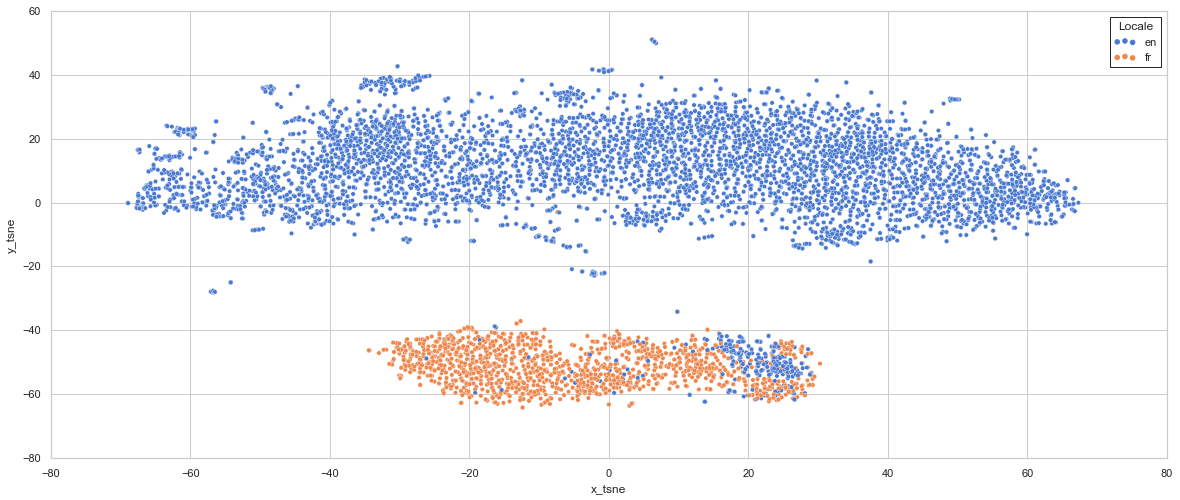

In [190]:
sns.set_theme(style="whitegrid")
fig_dims = (20,8)
fig, ax = plt.subplots(figsize=fig_dims, ncols=1)

sns.set(style="white", palette="muted")
sns.scatterplot(data = data_rec, x='x_tsne', y='y_tsne', hue ='Locale')

<AxesSubplot:xlabel='x_tsne_1', ylabel='y_tsne_1'>

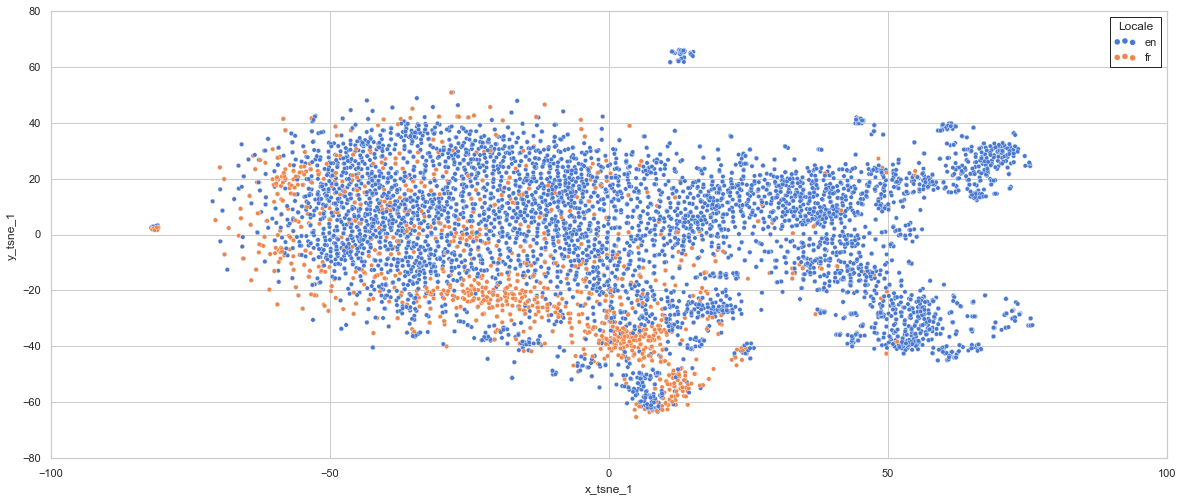

In [191]:
sns.set_theme(style="whitegrid")
fig_dims = (20,8)
fig, ax = plt.subplots(figsize=fig_dims, ncols=1)

sns.set(style="white", palette="muted")
sns.scatterplot(data = data_rec, x='x_tsne_1', y='y_tsne_1', hue ='Locale')#without discription


### Model

In [192]:
#id_name('sonypictures.com_tams22015100612584050', 'Id') --> ID example

#### Input Parameters

In [204]:
print('Enter -id')
id_ = input()


print('\nFlag-->Note if Id is used as input put flag =  Name')
flag = input()

print('it corresponds to --> {}'.format(id_name(id_, flag)))

print('\ncol_f--> if description to be included enter soup_proc otherwise soup_proc_1')
col_f = input()

print('\n vector --> cv for count vectorizer, tf-idf for tf idv, embedding for embedding model')
vector = input()

print('\n Similarity metric --> cosine and linear_kernel')
similarity = input()

print('\n No. of recommendation wanted')
neighbour = int(input())

Enter -id
sonypictures.com_tams22015100612584050

Flag-->Note if Id is used as input put flag =  Name
Id
it corresponds to --> Spider-Man 2

col_f--> if description to be included enter soup_proc otherwise soup_proc_1
soup_proc_1

 vector --> cv for count vectorizer, tf-idf for tf idv, embedding for embedding model
embedding

 Similarity metric --> cosine and linear_kernel
cosine

 No. of recommendation wanted
8


In [210]:
key = id_name(id_, flag)

In [205]:
get_recommendations(id_name(id_, flag),col_f,vector, similarity, neighbour )

4978                              Spider-man 3
4969                                Spider-Man
2079                               Good People
6477                          White House Down
1426                     Des hommes d'affaires
1007    Capitaine America : le premier vengeur
2256                                     Heist
4178                               Patch Adams
Name: Name, dtype: object

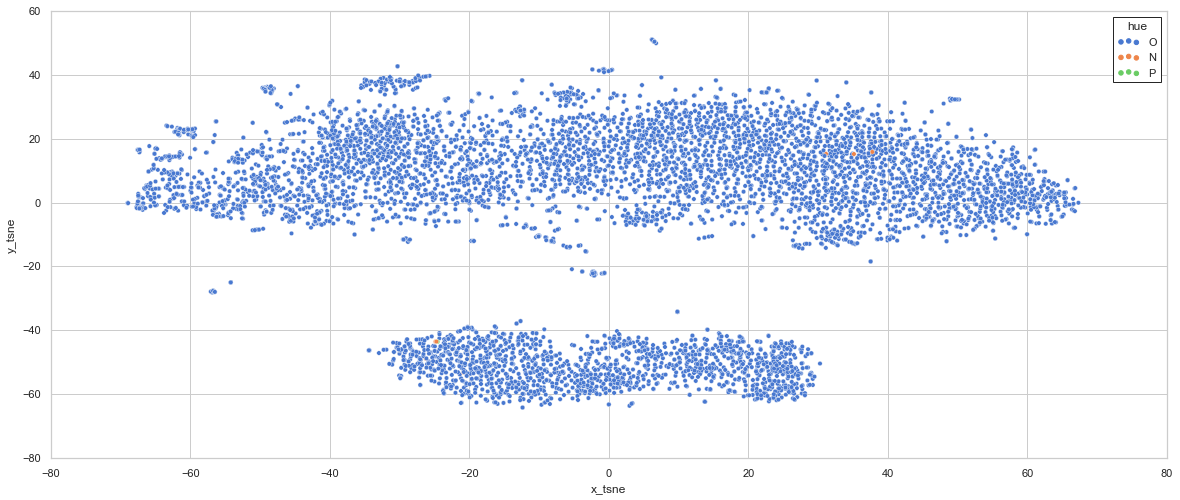

In [211]:
plot_n(get_recommendations(id_name(id_, flag),col_f,vector, similarity,neighbour))

### Future Scope